In [ ]:
!pip install roboflow

from roboflow import Roboflow
with open('SECRETS.txt') as f:
  API_KEY = f.read()
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("ricky-khare").project("far")
dataset = project.version(3).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=3d5659d72f25bdeab908147465be18664b37ca1a504c53e15c3bd86cb3e8bdf4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.

Extracting Dataset Version Zip to FAR-3 in yolov8:: 100%|██████████| 7521/7521 [00:01<00:00, 4008.56it/s]


In [ ]:
import os

In [ ]:
import shutil

shutil.rmtree('/content/FAR-3/train/labels')
shutil.rmtree('/content/FAR-3/test/labels')

In [ ]:
checkpoints = '/content/ImageNet/'

In [ ]:
if not os.path.exists('imagenet64'):
  if not os.path.exists(checkpoints + 'imagenet64.tar'):
    print("Downloading archive...")
    os.chdir(checkpoints)
    !wget https://pjreddie.com/media/files/imagenet64.tar
    os.chdir('/content/')
  print("Copying to local runtime...")
  shutil.copy(checkpoints + 'imagenet64.tar', './imagenet64.tar')
  print("Uncompressing...")
  !tar -xf imagenet64.tar
print("Data ready!")

--2023-05-24 06:46:05--  https://pjreddie.com/media/files/imagenet64.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10033909760 (9.3G) [application/octet-stream]
Saving to: ‘imagenet64.tar’

imagenet64.tar      100%[===================>]   9.34G  39.5MB/s    in 4m 3s   

2023-05-24 06:50:09 (39.3 MB/s) - ‘imagenet64.tar’ saved [10033909760/10033909760]

Copying to local runtime...
Uncompressing...
Data ready!


In [ ]:
DIR = '/content/data/train/1-feet'
tr_feet_len = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(tr_feet_len)

DIR = '/content/data/test/1-feet'
ts_feet_len = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(ts_feet_len)

3601
155


In [ ]:
train_dir = '/content/imagenet64/train'
new_train_dir = '/content/data/train/0-nonfeet'
train_nofeet_len = 0
for folder in os.listdir(train_dir):
  for f in os.listdir(train_dir + '/' + folder):
    if train_nofeet_len == tr_feet_len:
      break
    train_nofeet_len += 1
    old_dir = train_dir + '/' + folder + '/' + f
    os.rename(old_dir, new_train_dir + '/' + f)
  if train_nofeet_len == tr_feet_len:
      break

In [ ]:
test_dir = '/content/imagenet64/val'
new_test_dir = '/content/data/test/0-nonfeet'
test_nofeet_len = 0
for folder in os.listdir(test_dir):
  for f in os.listdir(test_dir + '/' + folder):
    if test_nofeet_len == ts_feet_len:
      break
    test_nofeet_len += 1
    old_dir = test_dir + '/' + folder + '/' + f
    os.rename(old_dir, new_test_dir + '/' + f)
  if test_nofeet_len == ts_feet_len:
      break

In [ ]:
DIR = '/content/data/train/0-nonfeet'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/data/test/0-nonfeet'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

3601
155


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
shutil.rmtree('/content/data/test/.ipynb_checkpoints')
shutil.rmtree('/content/data/train/.ipynb_checkpoints')
shutil.rmtree('/content/data/.ipynb_checkpoints')
shutil.rmtree('/content/imagenet64')

In [ ]:
batch_size = 32
img_height = 75
img_width = 100

DATA_DIR = '/content/data/train'
TEST_DIR = '/content/data/test'

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2,
  label_mode='categorical',
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  subset = "both"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  TEST_DIR,
  label_mode='categorical',
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 7202 files belonging to 2 classes.
Using 5762 files for training.
Using 1440 files for validation.
Found 310 files belonging to 2 classes.


In [100]:
type(test_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

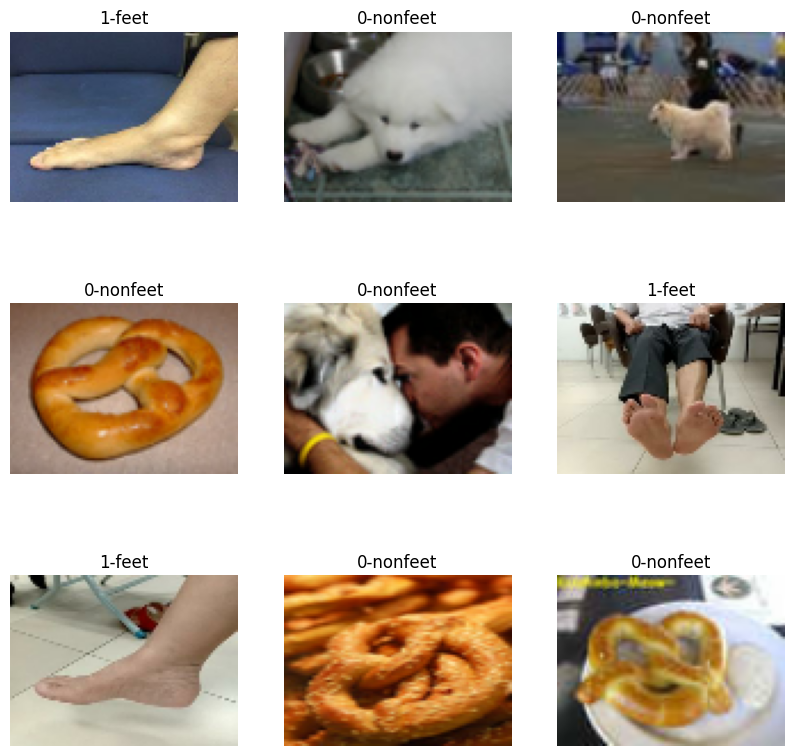

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [126]:
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(75, 100, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [ ]:
# base_model.summary()

In [127]:
batch_size = 32
img_height = 75
img_width = 100

In [128]:
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2, activation="sigmoid")

In [129]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip(seed=42),
  tf.keras.layers.RandomRotation(0.2, seed=120),
  tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1, seed=237),
  tf.keras.layers.RandomBrightness(factor=0.1, seed=410)
])

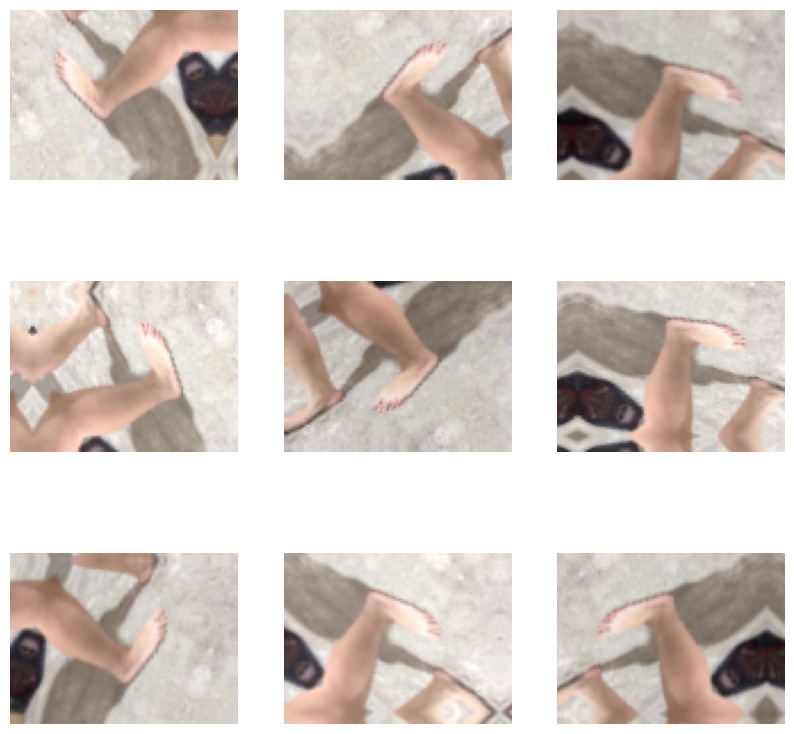

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [130]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
# x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [131]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 100, 3)]      0         
                                                                 
 sequential (Sequential)     (None, 75, 100, 3)        0         
                                                                 
 efficientnetv2-b0 (Function  (None, 3, 4, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562  

In [ ]:
len(model.trainable_variables)

2

In [132]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(val_ds)

45/45 [==============================] - 4s 22ms/step - loss: 0.7851 - accuracy: 0.4882


In [133]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.79
initial accuracy: 0.49


In [134]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/20
181/181 [==============================] - 15s 32ms/step - loss: 0.5508 - accuracy: 0.7294 - val_loss: 0.3224 - val_accuracy: 0.9389
Epoch 2/20
181/181 [==============================] - 6s 33ms/step - loss: 0.3176 - accuracy: 0.9016 - val_loss: 0.1964 - val_accuracy: 0.9646
Epoch 3/20
181/181 [==============================] - 7s 38ms/step - loss: 0.2223 - accuracy: 0.9391 - val_loss: 0.1429 - val_accuracy: 0.9694
Epoch 4/20
181/181 [==============================] - 5s 30ms/step - loss: 0.1773 - accuracy: 0.9528 - val_loss: 0.1156 - val_accuracy: 0.9750
Epoch 5/20
181/181 [==============================] - 7s 38ms/step - loss: 0.1501 - accuracy: 0.9606 - val_loss: 0.1001 - val_accuracy: 0.9764
Epoch 6/20
181/181 [==============================] - 7s 36ms/step - loss: 0.1333 - accuracy: 0.9634 - val_loss: 0.0876 - val_accuracy: 0.9771
Epoch 7/20
181/181 [==============================] - 6s 32ms/step - loss: 0.1195 - accuracy: 0.9660 - val_loss: 0.0775 - val_accuracy: 0.978

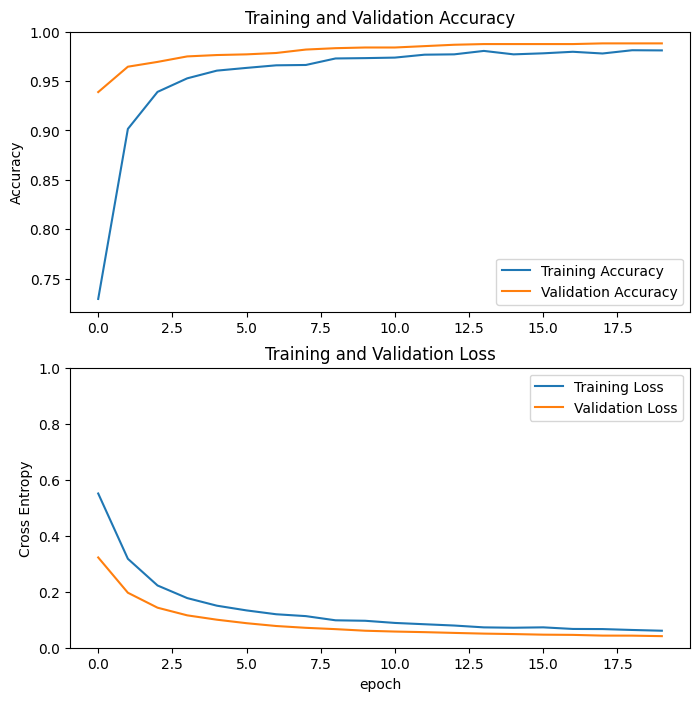

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [136]:
model.save("Saved_Model")

In [137]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

10/10 [==============================] - 0s 30ms/step - loss: 0.2743 - accuracy: 0.8677
Test accuracy : 0.8677419424057007


In [138]:
predictions = model.predict(test_ds)

10/10 [==============================] - 3s 20ms/step


In [139]:
len(predictions)

310

In [140]:
predictions = np.array([])
labels =  np.array([])
for x, lbl in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
  labels = np.concatenate([labels, np.argmax(lbl.numpy(), axis=-1)])

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

1/1 [==============================] - 2s 2s/step


array([[115,  40],
       [  1, 154]], dtype=int32)

In [87]:
import tensorflow_datasets as tfds

In [111]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [141]:
pod_test = '/content/test_podiatrist'
predictions = []
for f in os.listdir(pod_test):
  img = Image.open(pod_test + '/' + f)
  img = img.resize((100, 75))
  img_arr = tf.keras.utils.img_to_array(img)
  pred = model.predict(tf.expand_dims(img_arr, axis=0)).argmax()
  predictions.append(pred)

1/1 [==============================] - 0s 27ms/step


In [142]:
predictions = np.asarray(predictions)
np.mean(predictions)

0.8562874251497006